In [ ]:
#1. Understanding and Loading the datasets
#First Import Libraries like NumPy, pandas, and also import classes named sequential and dense from Keras library.

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns


     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


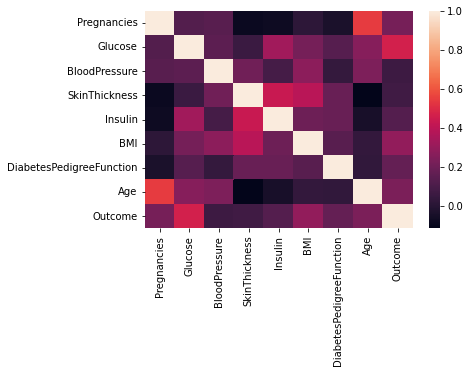

In [21]:
#The Pima Indians onset of diabetes dataset which is a standard machine learning dataset from the UCI Machine Learning repository. 
#This dataset tells about the patient medical record and whether they had an onset of diabetes within five years also it is a binary classification problem.
#Now import the dataset using pandas and then let us understand more about the datasets and then split the datasets into dependent and independent variables.

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' , 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dataset = pd.read_csv(url, names=names)
array = dataset.values
x = array[:,0:8]
y = array[:,8]
print(dataset)


corr=dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [22]:
#2. Defining the Keras Model
#Models in Keras are defined as a sequence of layers in which each layer is added one after another. 
#The input should contain input features and is specified when creating the first layer with the input_dims argument. 
#Here inputs_dims will be 8.

#Now a question arises that how can we decide the number of layers and number of neurons in each layer?
#In this example, a fully connected network with a three-layer is used which is defined using the Dense Class. 
#The first argument takes the number of neurons in that layer and, and the activation argument takes the activation function as an input. 
#Here ReLU is used as an activation function in the first two layers and sigmoid in the last layer as it is a binary classification problem.

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [23]:
#3. Compile Keras Model
#While compiling we must specify the loss function to calculate the errors, the optimizer for updating the weights and any metrics.
#In this case, we will use “binary_crossentropy“ as the loss argument as it is a binary classification problem.
#Here we will take optimizer as “adam“ as it automatically tunes itself and gives good results in a wide range of problems. 
#finally we will collect and report the classification accuracy through metrics argument.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:

#4. Fitting The Keras Model.
#Now we will fit our model on the loaded data by calling the fit() function on the model.
#The training process will run for a fixed number of iterations through the dataset which is specified using the epochs argument. 
#The number of dataset rows should be and are updated within each epoch, and set using the batch_size argument.
#Here, We will run for 150 epochs and a batch size of 10.

model.fit(x, y, epochs=150, batch_size=10)


Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 13.7590 - accuracy: 0.6523
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.5338 - accuracy: 0.5794
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0649 - accuracy: 0.5964
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9841 - accuracy: 0.5938
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9608 - accuracy: 0.5964
Epoch 6/150
77/77 [==============================] - 0s 3ms/step - loss: 0.9043 - accuracy: 0.6081
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8569 - accuracy: 0.5951
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8307 - accuracy: 0.6042
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7926 - accuracy: 0.6172
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7715 - accuracy: 0.6055
Epoch 11

In [26]:

#5. Evaluate Keras Model
#The evaluation of the model on the dataset can be done using the evaluate() function. 
#It takes two arguments i.e, input and output. 
#It will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics such as accuracy.
#The evaluate() function will return a list with two values first one is the loss of the model and the second will be the accuracy of the model on the dataset. 
#We are only interested in reporting the accuracy and hence we ignored the loss value.

_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))


24/24 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 0.7760
Accuracy: 77.60


In [36]:
#6. Make Predictions
#Prediction can be done by calling the predict() function on the model. 
#Here sigmoid activation function is used on the output layer, so the predictions will be a probability in the range between 0 and 1.

predictions = model.predict(x)
rounded = [round(X[0]) for X in predictions]
print(rounded)

[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 